In [1]:
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [2]:
def load_images_from_directory(directory):
    data = []
    labels = []
    classes = sorted(os.listdir(directory))  

    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                image_path = os.path.join(class_dir, filename)
                if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image = Image.open(image_path)
                    image_array = np.array(image)
                    data.append(image_array)
                    labels.append(class_name)  

    return np.array(data), np.array(labels)

In [3]:
dataset_path = '../satellite_images'
images, labels = load_images_from_directory(dataset_path)

In [4]:
print(f"Total de imágenes cargadas: {len(images)}")
print(f"Dimensiones de una imagen ejemplo: {images[0].shape}")
print(f"Etiqueta de la primera imagen: {labels[0]}")


Total de imágenes cargadas: 27000
Dimensiones de una imagen ejemplo: (64, 64, 3)
Etiqueta de la primera imagen: AnnualCrop


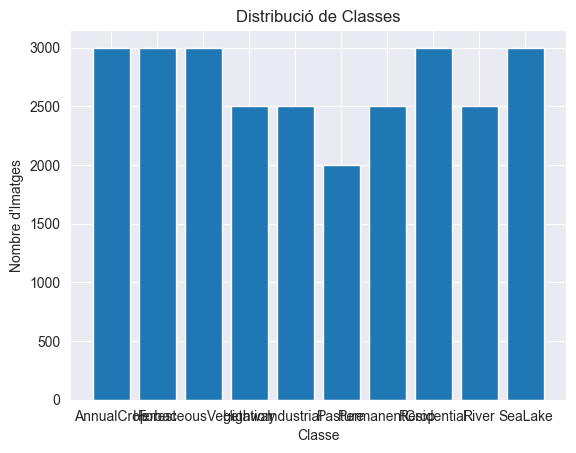

In [5]:
class_distribution = Counter(labels)
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title("Distribució de Classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'Imatges")
plt.show()


In [6]:
dimensions = [img.shape for img in images]
print("Dimensions úniques d'imatges:", set(dimensions))


Dimensions úniques d'imatges: {(64, 64, 3)}


In [7]:
images_normalized = np.array(images, dtype=np.float32) / 255.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(images_normalized, labels, test_size=0.2, random_state=42)

print("Distribución de clases en el conjunto de entrenamiento:", Counter(y_train))
print("Distribución de clases en el conjunto de prueba:", Counter(y_test))

Distribución de clases en el conjunto de entrenamiento: Counter({'AnnualCrop': 2405, 'Residential': 2403, 'HerbaceousVegetation': 2398, 'Forest': 2394, 'SeaLake': 2394, 'PermanentCrop': 2027, 'River': 2010, 'Industrial': 2007, 'Highway': 1985, 'Pasture': 1577})
Distribución de clases en el conjunto de prueba: Counter({'Forest': 606, 'SeaLake': 606, 'HerbaceousVegetation': 602, 'Residential': 597, 'AnnualCrop': 595, 'Highway': 515, 'Industrial': 493, 'River': 490, 'PermanentCrop': 473, 'Pasture': 423})


In [9]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train.reshape((X_train.shape[0], -1)), y_train)
y_pred = dtree.predict(X_test.reshape((X_test.shape[0], -1)))

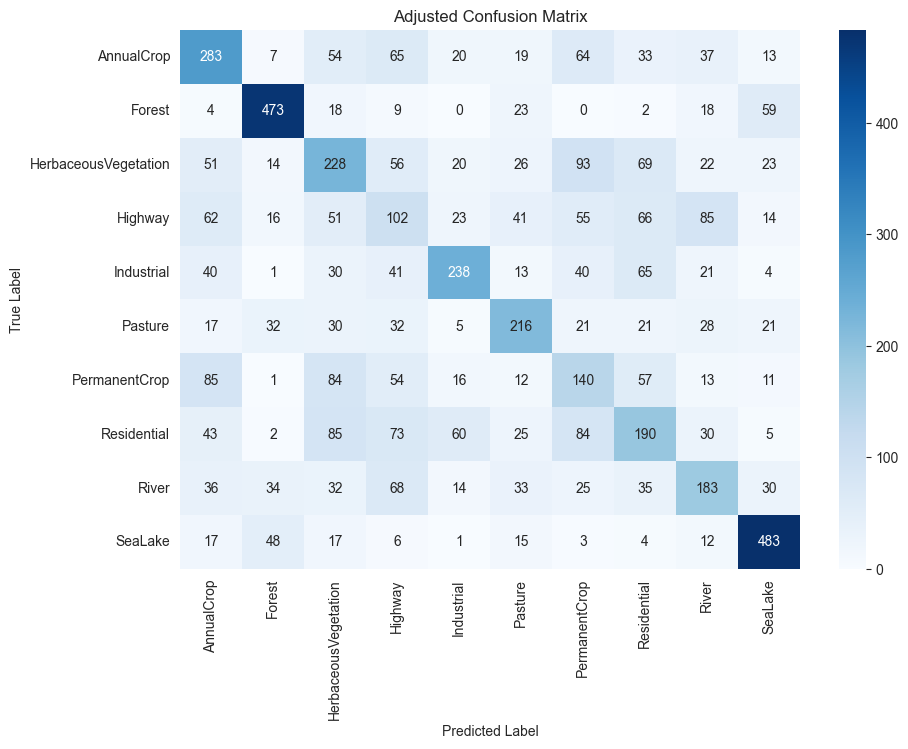

                      precision    recall  f1-score   support

          AnnualCrop       0.44      0.48      0.46       595
              Forest       0.75      0.78      0.77       606
HerbaceousVegetation       0.36      0.38      0.37       602
             Highway       0.20      0.20      0.20       515
          Industrial       0.60      0.48      0.53       493
             Pasture       0.51      0.51      0.51       423
       PermanentCrop       0.27      0.30      0.28       473
         Residential       0.35      0.32      0.33       597
               River       0.41      0.37      0.39       490
             SeaLake       0.73      0.80      0.76       606

            accuracy                           0.47      5400
           macro avg       0.46      0.46      0.46      5400
        weighted avg       0.47      0.47      0.47      5400



In [10]:
# Assuming y_test and y_pred contain class names directly
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Adjusted Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_test, y_pred))